## Diamond prices

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from module import *  # in-house module

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## load main dataset
df = sns.load_dataset('diamonds')
df = df[['price','carat','color','cut','clarity']]
cv_errors = pd.DataFrame()  # used to store errors for plotting
tt_errors = pd.DataFrame()  # ^^

In [ ]:
## Some basic data exploration



In [109]:
## Basic regression: price ~ b1*carat + e

y = ['price']
X = ['carat']

pipe = Pipeline([
    ('ols', LinearRegression(fit_intercept=False))
])

cross_validate(data=df, endog=y, exog=X, model=pipe)

Cross-validation results: mae = 1540.23, stdev_err = 1163.73


Text(0.5, 1.0, 'Test errors')

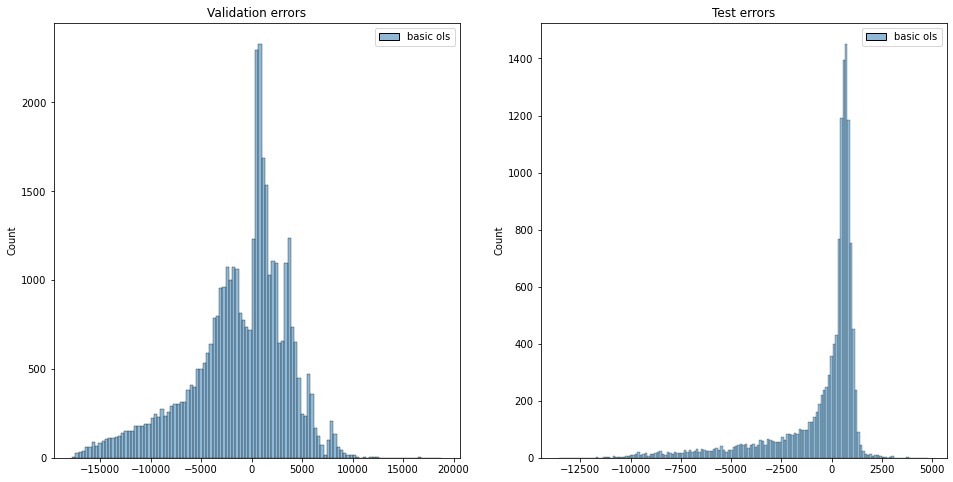

In [110]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

cv_errors['basic ols'], tt_errors['basic ols'] = get_errors(df, pipe, X, y)
sns.histplot(cv_errors, log_scale=False, ax=ax[0]).set_title('Validation errors')
sns.histplot(tt_errors, log_scale=False, ax=ax[1]).set_title('Test errors')

In [111]:
## Allow prices to be quadratic in carats: price ~ b0 + b1*carat * b2*carat^2 + e

y = ['price']
X = ['carat']

pipe = Pipeline([
    ('pol', PolynomialFeatures(2)),
    ('ols', LinearRegression(fit_intercept=False))
])

cross_validate(data=df, endog=y, exog=X, model=pipe)

Cross-validation results: mae = 953.98, stdev_err = 1211.06


Text(0.5, 1.0, 'Test errors')

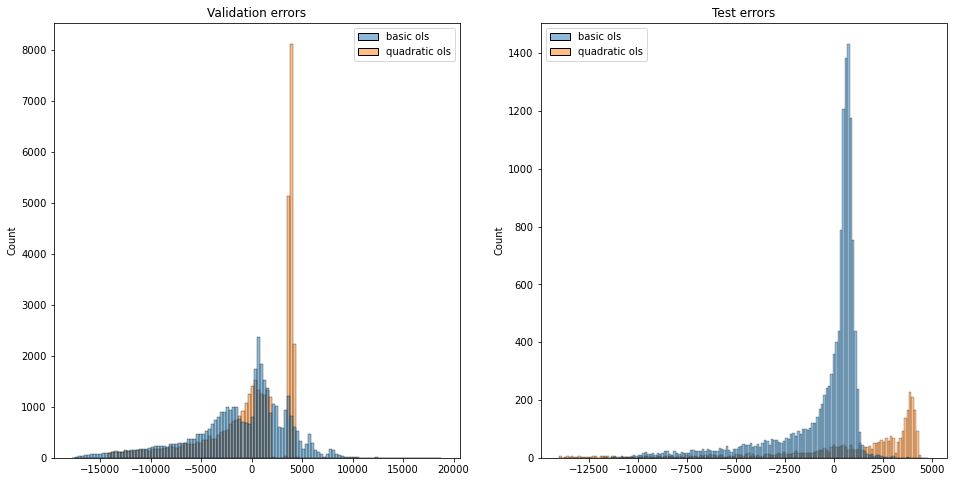

In [112]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

cv_errors['quadratic ols'], tt_errors['quadratic ols'] = get_errors(df, pipe, X, y)
sns.histplot(cv_errors, log_scale=False, ax=ax[0]).set_title('Validation errors')
sns.histplot(tt_errors, log_scale=False, ax=ax[1]).set_title('Test errors')

In [113]:
## Regression with dummies for categories: price ~ b0 + b1*carat + b2*carat^2 + b3*VVS1 + ... + e

df_dummies = df.drop(['cut','color','clarity'], axis='columns')\
    .join(pd.get_dummies(df.cut, drop_first=True))\
    .join(pd.get_dummies(df.color, drop_first=True))\
    .join(pd.get_dummies(df.clarity, drop_first=True))

y = ['price']
X = [col for col in df_dummies.columns if col != 'price']

pipe = Pipeline([
    ('pol', PolynomialFeatures(1)),
    ('ols', LinearRegression(fit_intercept=False))
])

cross_validate(data=df_dummies, endog=y, exog=X, model=pipe)

Cross-validation results: mae = 804.27, stdev_err = 832.6


Text(0.5, 1.0, 'Test errors')

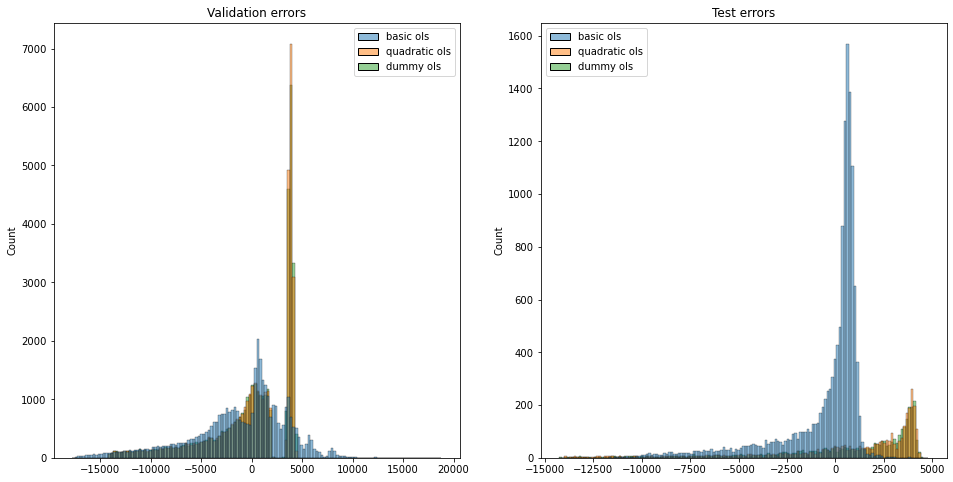

In [114]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

cv_errors['dummy ols'], tt_errors['dummy ols'] = get_errors(df_dummies, pipe, X, y)
sns.histplot(cv_errors, log_scale=False, ax=ax[0]).set_title('Validation errors')
sns.histplot(tt_errors, log_scale=False, ax=ax[1]).set_title('Test errors')

In [115]:
## Random forest reg

# df_rf = df.copy()
#
# for col in ['cut', 'clarity', 'color']:
#     df_rf[col] = df_rf[col].cat.codes
#
# y = ['price']
# X = [col for col in df_dummies.columns if col != 'price']
#
# pipe = Pipeline([
#     ('pol', PolynomialFeatures(2)),
#     ('rfr', RandomForestRegressor(n_estimators = 10, max_depth = 10))
# ])
#
# cross_validate(data=df_dummies, endog=y, exog=X, model=pipe)